1. Git Repository & Code Management

 2. Simple Programming & Exploratory Analytics

2.1 Images


### MNIST Image Processing ###


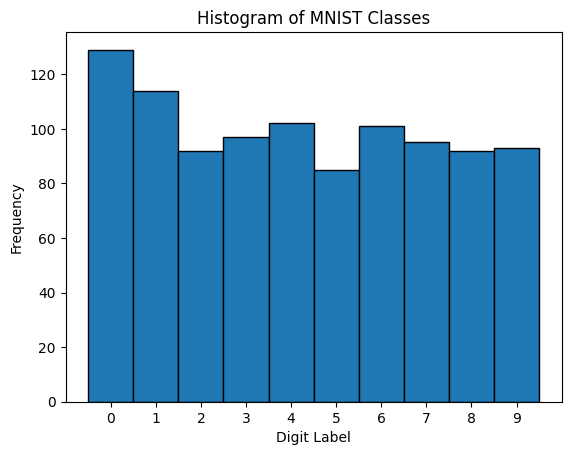

Batched data shape: torch.Size([40, 25, 1, 28, 28])


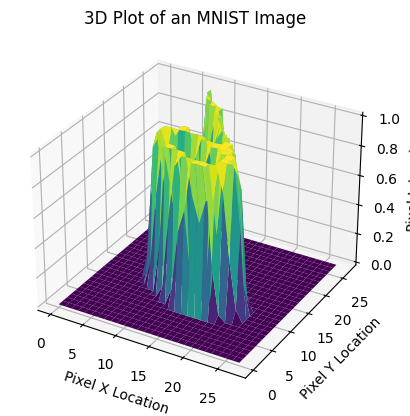


Task 2.1 Complete


In [32]:
import numpy as np  # Supports large, multi-dimensional arrays and mathematical functions
import matplotlib.pyplot as plt  # A plotting library for visualizations
import torch  # PyTorch for deep learning applications
import torchvision  # Provides datasets, model architectures, and transformations for PyTorch
import torchvision.transforms as transforms  # Image preprocessing transformations
from torch.utils.data import Subset  # Handles dataset subsets in PyTorch
from mpl_toolkits.mplot3d import Axes3D  # Toolkit for creating 3D plots in Matplotlib
from einops import rearrange  # Flexible tensor operations for reshaping

# ===============================
# 1. Load and Preprocess MNIST Dataset
# ===============================
print("\n### MNIST Image Processing ###")  # Print section title

# Load and preprocess MNIST dataset
mnist_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())  # Download and load MNIST dataset, converting images to tensors

# Select a random subset of 1000 samples
subset_indices = np.random.choice(len(mnist_data), 1000, replace=False)  # Randomly select 1000 indices
mnist_subset = Subset(mnist_data, subset_indices)  # Create subset with selected indices

# ===============================
# 2. Plot Histogram of MNIST Classes
# ===============================
# Extract labels from the subset
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]  # Get class labels

# Plot histogram of digit classes in the subset
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black')  # Plot histogram of class distribution
plt.xticks(range(10))  # Set x-axis ticks from 0-9
plt.xlabel("Digit Label")  # Label x-axis
plt.ylabel("Frequency")  # Label y-axis
plt.title("Histogram of MNIST Classes")  # Set title
plt.show()  # Display histogram

# ===============================
# 3. Batch the MNIST Data
# ===============================
# Reshape data into batches of 25 samples each using einops
batched_data = rearrange(torch.stack([mnist_subset[i][0] for i in range(1000)]), '(b s) 1 h w -> b s 1 h w', b=40, s=25)
print(f"Batched data shape: {batched_data.shape}")  # Print shape of batched data

# ===============================
# 4. 3D Visualization of an MNIST Image
# ===============================
# Select a random MNIST image for 3D visualization
image, _ = mnist_subset[np.random.randint(1000)]  # Select a random image from the subset
x, y = np.meshgrid(np.arange(28), np.arange(28))  # Create a grid for pixel positions

# Create 3D plot
fig = plt.figure()  # Create a figure for plotting
ax = fig.add_subplot(111, projection='3d')  # Set up a 3D plot
ax.plot_surface(x, y, image.squeeze().numpy(), cmap='viridis')  # Plot pixel intensity in 3D
plt.xlabel("Pixel X Location")  # Label x-axis
plt.ylabel("Pixel Y Location")  # Label y-axis
ax.set_zlabel("Pixel Intensity")  # Label z-axis
plt.title("3D Plot of an MNIST Image")  # Set title
plt.show()  # Display 3D plot

# Print completion message
print("\nTask 2.1 Complete")



2.2 Time Series

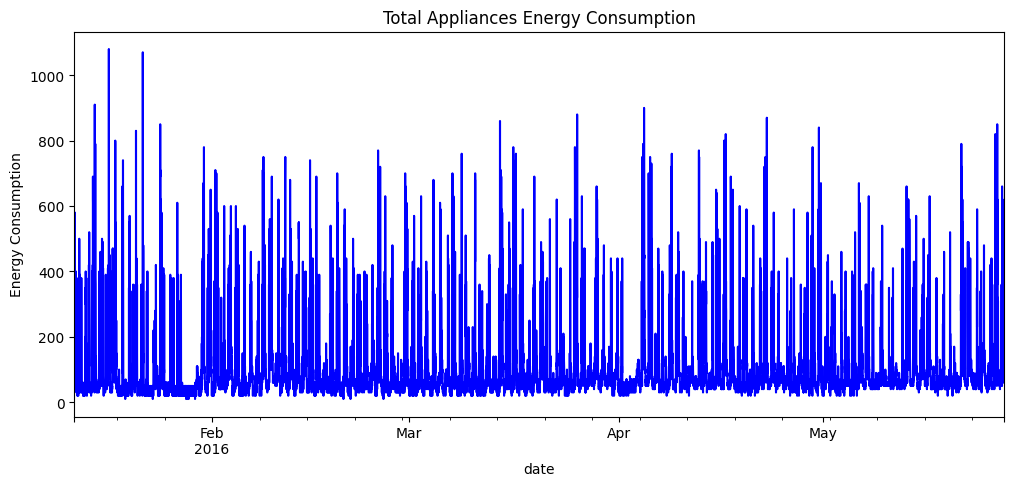

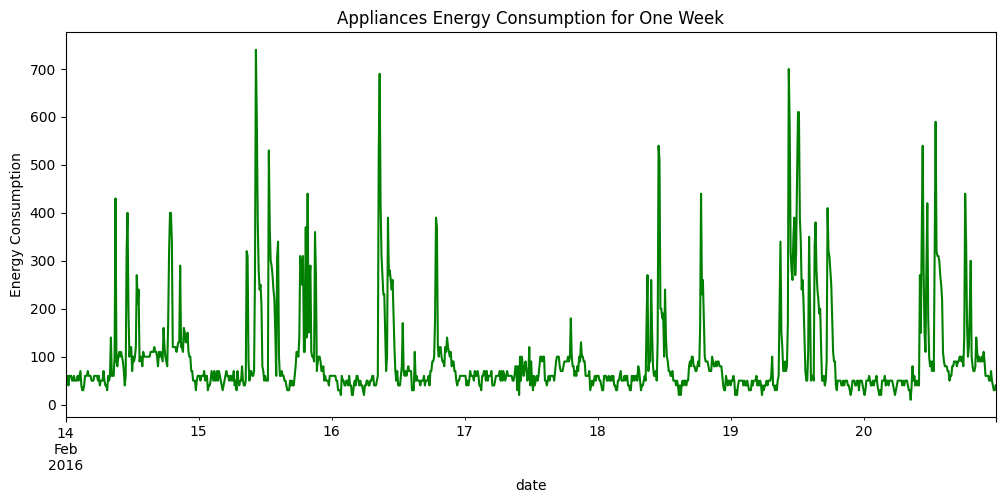

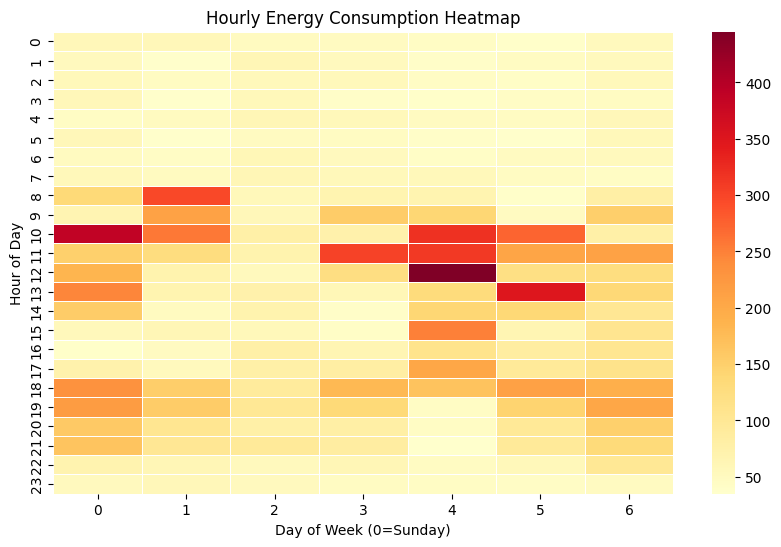

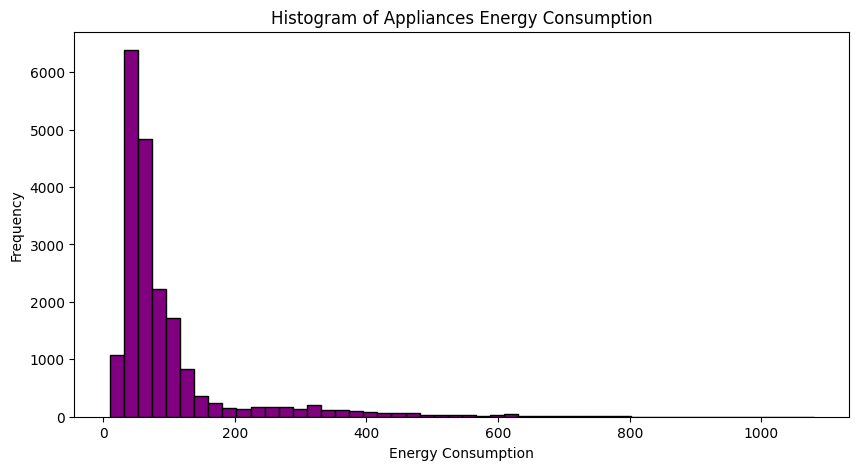

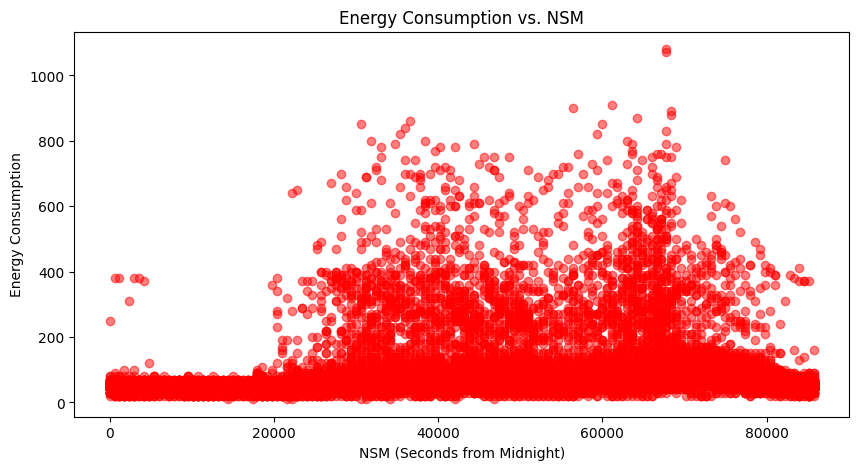

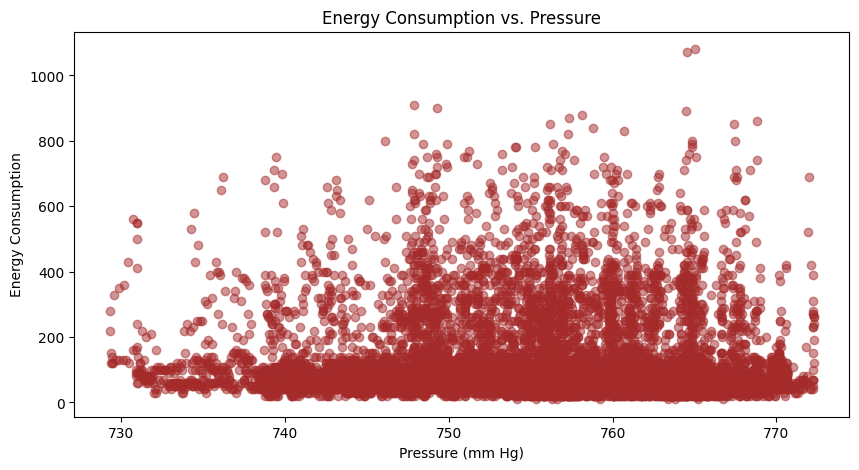


The feature NSM seems to have a strong correlation to energy consumption that aligns with increased human activity at the hours of 0800 and 1800.

This is further supported by the data in that signifgantly less activity is observed in the hours of the night and to a lesser extent part of the work day.

For the feature of pressure, there is less of a strong correlation, but it appears that the pressure between 745-770 has increased energy consumption

Task 2.2 Completed!


In [33]:
import numpy as np  # Provides support for mathematical operations and handling arrays
import pandas as pd  # For data analysis and handling structured datasets
import matplotlib.pyplot as plt  # For creating visualizations and plots
import seaborn as sns  # For statistical visualizations, especially heatmaps

# ===============================
# 0. Load the data (energydata_complete.csv) and perform the following analysis.
# ===============================
# Load energy consumption data directly from GitHub into a Pandas DataFrame
url = "https://github.com/LuisM78/Appliances-energy-prediction-data/raw/master/energydata_complete.csv"
df_energy = pd.read_csv(url, parse_dates=["date"], index_col="date")  # Parse 'date' column as datetime and set as index

# ===============================
# 1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.
# ===============================
# Function to generate time series plots
def plot_time_series(series, title, color):
    """Plots a time series graph for energy consumption with a specified color."""
    series.plot(figsize=(12, 5), title=title, ylabel="Energy Consumption", color=color)  # Create time series plot
    plt.show()  # Display the plot

# Plot total appliances energy consumption over time
plot_time_series(df_energy["Appliances"], "Total Appliances Energy Consumption", "blue")

# Plot appliances energy consumption for a specific week
plot_time_series(df_energy.loc['2016-02-14':'2016-02-20', "Appliances"], "Appliances Energy Consumption for One Week", "green")

# ===============================
# 2. Plot heatmap of hourly consumption of appliances for a week.
# ===============================
# Extract hour and day of the week from the dataset
weekly_df = df_energy.loc['2016-02-14':'2016-02-20'].copy()  # Copy subset of data for a week
weekly_df["Hour"] = weekly_df.index.hour  # Extract hour from datetime index
weekly_df["Day"] = weekly_df.index.dayofweek  # Extract day of the week from datetime index

# Create a pivot table for the heatmap
weekly_data = weekly_df.pivot_table(values="Appliances", index="Hour", columns="Day")  # Structure data for heatmap

# Generate the heatmap for hourly appliance energy consumption
plt.figure(figsize=(10, 6))  # Set figure size before plotting
sns.heatmap(weekly_data, cmap="YlOrRd", linewidths=0.5)  # Create heatmap using seaborn
plt.xlabel("Day of Week (0=Sunday)")  # Label x-axis
plt.ylabel("Hour of Day")  # Label y-axis
plt.title("Hourly Energy Consumption Heatmap")  # Set title
plt.show()  # Display heatmap

# ===============================
# 3. Plot the histogram of energy consumption of appliances.
# ===============================
# Generate histogram to analyze energy consumption distribution
plt.figure(figsize=(10, 5))  # Set figure size
plt.hist(df_energy["Appliances"], bins=50, edgecolor='black', color="purple")  # Create histogram with 50 bins
plt.xlabel("Energy Consumption")  # Label x-axis
plt.ylabel("Frequency")  # Label y-axis
plt.title("Histogram of Appliances Energy Consumption")  # Set title
plt.show()  # Display histogram

# ===============================
# 4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.
# ===============================
# Compute NSM (Number of Seconds from Midnight) for each timestamp
df_energy["NSM"] = df_energy.index.hour * 3600 + df_energy.index.minute * 60 + df_energy.index.second  # Convert time to seconds

# Function to generate scatter plots
def plot_scatter(x, y, xlabel, ylabel, title, color):
    """Plots a scatter plot for two given variables with a specified color."""
    plt.figure(figsize=(10, 5))  # Set figure size
    plt.scatter(x, y, alpha=0.5, color=color)  # Create scatter plot with transparency for better visibility
    plt.xlabel(xlabel)  # Label x-axis
    plt.ylabel(ylabel)  # Label y-axis
    plt.title(title)  # Set title
    plt.show()  # Display scatter plot

# Plot energy consumption vs. NSM
plot_scatter(df_energy["NSM"], df_energy["Appliances"], "NSM (Seconds from Midnight)", "Energy Consumption", "Energy Consumption vs. NSM", "red")

# ===============================
# 5. Plot appliances energy consumption vs. Press mm Hg.
# ===============================
# Plot scatter plot to analyze relationship between energy consumption and atmospheric pressure
plot_scatter(df_energy["Press_mm_hg"], df_energy["Appliances"], "Pressure (mm Hg)", "Energy Consumption", "Energy Consumption vs. Pressure", "brown")

# ===============================
# 6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.
# ===============================
# Print Comment Answers to Prompt 6
print("\nThe feature NSM seems to have a strong correlation to energy consumption that aligns with increased human activity at the hours of 0800 and 1800.")
print("\nThis is further supported by the data in that signifgantly less activity is observed in the hours of the night and to a lesser extent part of the work day.")
print("\nFor the feature of pressure, there is less of a strong correlation, but it appears that the pressure between 745-770 has increased energy consumption")
# Print completion message to confirm execution
print("\nTask 2.2 Completed!")


2.3 Multi-variate

In [31]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical calculations
from scipy.stats import kurtosis, skew  # Import statistical functions for kurtosis and skewness

# ===============================
# 0. Load the dataset from UCI Repository
# ===============================
# Define column names as the dataset does not contain headers
column_names = [
    "Frequency (Hz)",  # Frequency of sound in Hz
    "Angle of Attack (degrees)",  # Angle at which the airfoil is inclined
    "Chord Length (m)",  # Length of the airfoil chord (front to back)
    "Velocity (m/s)",  # Free-stream velocity of airflow
    "Displacement Thickness (m)",  # Thickness of suction side boundary layer
    "Scaled Sound Pressure (dB)"  # Measured noise level in decibels
]

# Load dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
df_airfoil = pd.read_csv(url, sep="\t", header=None, names=column_names)

# ===============================
# 1. Compute Descriptive Statistics
# ===============================
# Calculate statistics for each column
stats = {
    "Mean": df_airfoil.mean(),  # Compute mean of each column
    "Variance": df_airfoil.var(),  # Compute variance of each column
    "Standard Deviation": df_airfoil.std(),  # Compute standard deviation of each column
    "Median": df_airfoil.median(),  # Compute median of each column
    "Kurtosis": kurtosis(df_airfoil, axis=0),  # Compute kurtosis of each column
    "Skewness": skew(df_airfoil, axis=0),  # Compute skewness of each column
    "Range": df_airfoil.max() - df_airfoil.min()  # Compute range of each column
}

# Convert stats dictionary into a DataFrame for better visualization
stats_df = pd.DataFrame(stats)

# Display the computed statistics in an easy-to-read format
print("\nDescriptive Statistics of Airfoil Self-Noise Data\n")
print(stats_df.to_string())

# Final confirmation that all calculations are complete
print("\nTask 2.3 Completed!")



Descriptive Statistics of Airfoil Self-Noise Data

                                   Mean      Variance  Standard Deviation       Median  Kurtosis  Skewness         Range
Frequency (Hz)              2886.380572  9.938717e+06         3152.573137  1600.000000  5.685722  2.134951  19800.000000
Angle of Attack (degrees)      6.782302  3.502424e+01            5.918128     5.400000 -0.415568  0.688476     22.200000
Chord Length (m)               0.136548  8.749868e-03            0.093541     0.101600 -1.038504  0.457001      0.279400
Velocity (m/s)                50.860745  2.425116e+02           15.572784    39.600000 -1.562743  0.235617     39.600000
Displacement Thickness (m)     0.011140  1.729287e-04            0.013150     0.004957  2.207539  1.700465      0.058011
Scaled Sound Pressure (dB)   124.835943  4.759146e+01            6.898657   125.721000 -0.317132 -0.418534     37.607000

Task 2.3 Completed!
